**IMPORTING LIBRARIES**

**Linear Regression
Q1. Problem Statement: Predicting Final Exam Scores Based on Hours of Study**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

**DATA IMPORTING**

In [ ]:
df = pd.read_csv('/content/score (1).csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**UNDERSTAND THE DATA**

In [ ]:
df.shape

(25, 2)

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**DATA PREPROCESSING**

In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

NO MISSING VALUES FOUND

**EDA**

In [ ]:
import seaborn as sns

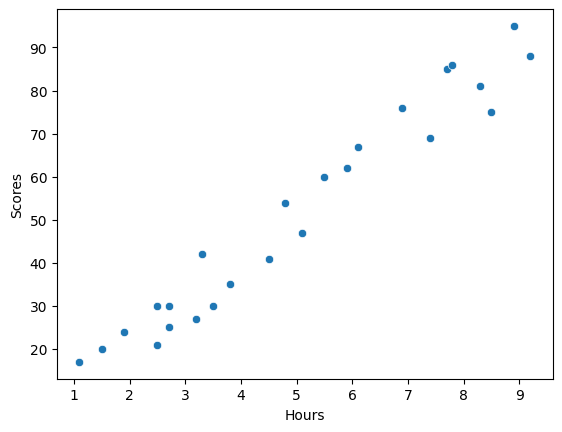

In [ ]:
sns.scatterplot(data = df, x='Hours',y='Scores')
plt.show()

From scatter plot,we can see there is a linear positive association between the Scores and the Number of Hours studied, with an increase in the Study hours resulting in an increase in the Marks scored.As a result, we can use the supervised machine learning model for linear regression on it to forecast future values.

In [ ]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**MODEL DEVELOPMENT**

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

reg = LinearRegression()
reg.fit(x_train.reshape(-1,1), y_train)


LinearRegression()

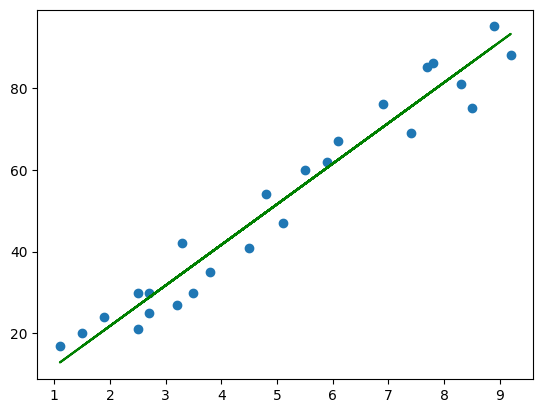

In [ ]:
#Plotting the Regression Line
m=reg.coef_
c=reg.intercept_
line=m*x+c
plt.scatter(x,y)
plt.plot(x,line, color = "green")
plt.show()

In [ ]:
#Testing data
print(x_test)
#Model Prediction
y_pred = reg.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
#Comparing Acutal vs Predicted
actual_predicted=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
actual_predicted

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
#Estimating training and test score
print("Training Score:",reg.score(x_train,y_train))
print("Test Score:",reg.score(x_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105354


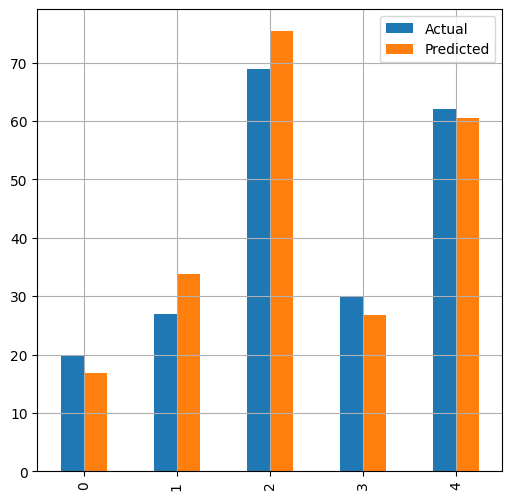

In [ ]:
# Plotting the Bar graph to depict the difference between the actual and predicted value
actual_predicted.plot(kind='bar',figsize=(6,6))
plt.grid(which='major', linewidth='0.8')
plt.grid(which='minor', linewidth='0.8')
plt.show()

In [ ]:
y_pred=reg.predict(x_test)
df=pd.DataFrame({"Actual":y_test,"Predict":y_pred})
print(df)
print("Accuracy:",reg.score(x,y)*100)

   Actual    Predict
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033
Accuracy: 95.26947647057273


In [ ]:
hours=9
p=reg.predict([[hours]])
print(f"If a student studied for {hours} hours/day will score{p}% in exam.")

If a student studied for 9 hours/day will score[91.21406837]% in exam.


**MODEL EVALUATION**

In [ ]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

Mean Squared Error: 21.598769307217456
R2 score: 0.9454906892105354


**INTERPRETATION & REPORTING:**
The linear regression model can accurately predict student scores based
on the number of study hours. For example, a student studying 9 hours/day is predicted to score approximately 91.21% in the exam. A successful model for predicting student scores based on study hours, with a high accuracy of 94.55%.

---



---



---



---



---



**Q2. Problem Statement: Predicting Salary Increase Based on Years of Experience**

**LOADING DATA**

In [ ]:
pf=pd.read_csv("/content/Salary_Data (1).csv")


In [ ]:
pf.head()

,Employee_ID,Years_of_Experience,Current_Salary,Last_Salary,Salary_Increase
0,1101,1.1,68343,29000,39343
1,1102,1.3,69205,23000,46205
2,1103,1.5,120731,83000,37731
3,1104,2.0,128525,85000,43525
4,1105,2.2,58891,19000,39891


In [ ]:
pf.describe()

,Employee_ID,Years_of_Experience,Current_Salary,Last_Salary,Salary_Increase
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1115.500000,5.313333,127217.000000,51214.000000,76003.000000
std,8.803408,2.837888,37734.523337,22606.467277,27414.429785
min,1101.000000,1.100000,58891.000000,13300.000000,37731.000000
25%,1108.250000,3.200000,101791.250000,33525.000000,56720.750000
50%,1115.500000,4.700000,123688.000000,51900.000000,65237.000000
75%,1122.750000,7.700000,152826.000000,65225.000000,100544.750000
max,1130.000000,10.500000,200135.000000,87500.000000,122391.000000


In [ ]:
pf.shape

(30, 5)

**DATA PREPROCESSING**

In [ ]:
#Checking for null values
pf.isnull().sum()

Employee_ID            0
Years_of_Experience    0
Current_Salary         0
Last_Salary            0
Salary_Increase        0
dtype: int64

In [ ]:
pf.isnull().any()

Employee_ID            False
Years_of_Experience    False
Current_Salary         False
Last_Salary            False
Salary_Increase        False
dtype: bool

In [ ]:
pf.drop_duplicates(pf)

,Employee_ID,Years_of_Experience,Current_Salary,Last_Salary,Salary_Increase
0,1101,1.1,68343,29000,39343
1,1102,1.3,69205,23000,46205
2,1103,1.5,120731,83000,37731
3,1104,2.0,128525,85000,43525
4,1105,2.2,58891,19000,39891
5,1106,2.9,84642,28000,56642
6,1107,3.0,91350,31200,60150
7,1108,3.2,100445,46000,54445
8,1109,3.2,123345,58900,64445
9,1110,3.7,139689,82500,57189


**Exploratory Data Analysis**

In [ ]:
pf.corr()


,Employee_ID,Years_of_Experience,Current_Salary,Last_Salary,Salary_Increase
Employee_ID,1.000000,0.986460,0.783215,0.142161,0.960826
Years_of_Experience,0.986460,1.000000,0.781338,0.117907,0.978242
Current_Salary,0.783215,0.781338,1.000000,0.693631,0.804466
Last_Salary,0.142161,0.117907,0.693631,1.000000,0.130127
Salary_Increase,0.960826,0.978242,0.804466,0.130127,1.000000


In [ ]:
print(pf["Years_of_Experience"].corr(pf["Salary_Increase"]))

0.9782416184887599


In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [ ]:
X = pf["Years_of_Experience"].values.reshape(-1,1)
y = pf["Salary_Increase"].values.reshape(-1,1)


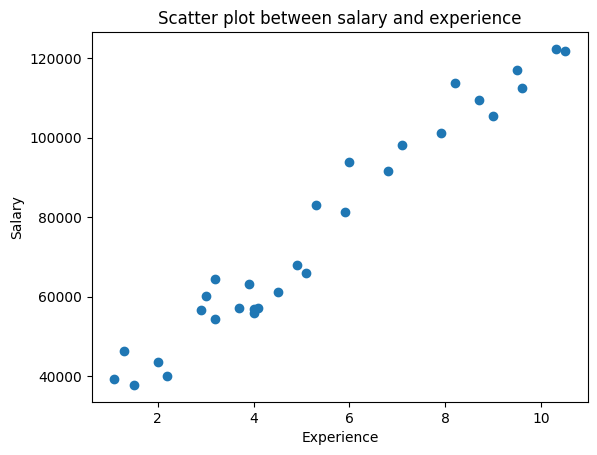

In [ ]:
plt.scatter(X,y)
plt.title('Scatter plot between salary and experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

**MODEL DEVELOPMENT**

In [ ]:
# Train and test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

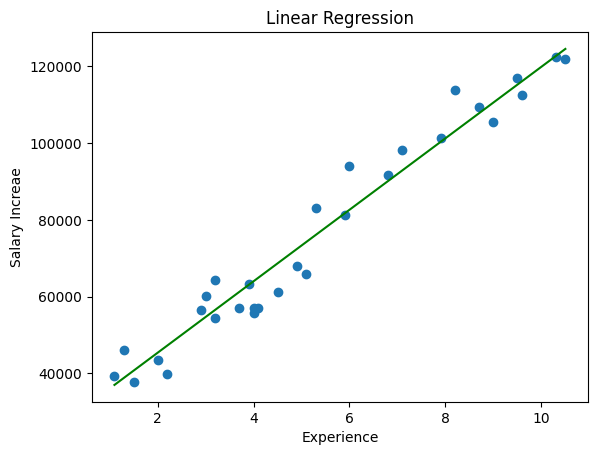

In [ ]:
#Plotting the Regression Line
m=model.coef_
c=model.intercept_
line=m*X+c
plt.scatter(X,y)
plt.title('Linear Regression')
plt.xlabel('Experience')
plt.ylabel('Salary Increae')
plt.plot(X,line, color = "green")
plt.show()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
#Testing data
print(X_test)
#Model Prediction
Y_pred = model.predict(X_test)

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]]


In [ ]:
#Estimating training and test score
print("Training Score:",model.score(X_train,y_train))
print("Test Score:",model.score(X_test,y_test))

Training Score: 0.9411949620562126
Test Score: 0.988169515729126


**EVALUATION OF MODEL**

In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:',r2_score(y_test,y_pred))



Mean Squared Error: 12823412.298126549
R2 score: 0.988169515729126


**POLICY IMPLEMENTATION**
There is a high correlation between Salary_Increase and Years of Experience i.e. 0.978 which is approximately 98%.This can be used for:

**Equity**: Ensure fairness by monitoring compensation consistency for employees with similar experience levels.


**Recruitment**: This information can also be used in the recruitment process. It can help in setting competitive salary expectations for candidates based on their years of experience.